# FRESHNESS OF FOOD DETECTION USING ML AND IOT

## BATCH NO:B013
### 221710302001-R AASHRITH
### 221710302008-MAHIDHAR
### 221710302038-MOTUPALLY SUNDARA CHARYA
### 221710302050-PRANAVI

#### preprocessing of the data :

In [152]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import sklearn
import seaborn as sns

In [153]:
l=pd.read_csv("freshnessdataset.csv")
l


Ammonia  Oxygen  Temperature  Time_days  Condition_ripe     Outcome
0        28      28            9         45               1      spoilt
1         2       3           13         14               1      spoilt
2         8       1            6         64               1      spoilt
3        25      18           22          6               1      spoilt
4        15      26           21         63               0  not spoilt
..      ...     ...          ...        ...             ...         ...
95        5      35           15         20               0  not spoilt
96        7      26           19         40               0  not spoilt
97       37       9            8         33               1      spoilt
98       10      34           15         84               0  not spoilt
99        6      40           23         25               0  not spoilt

[100 rows x 6 columns]

In [154]:
l=pd.read_csv("freshnessdataset.csv")
l.head()

Ammonia  Oxygen  Temperature  Time_days  Condition_ripe     Outcome
0       28      28            9         45               1      spoilt
1        2       3           13         14               1      spoilt
2        8       1            6         64               1      spoilt
3       25      18           22          6               1      spoilt
4       15      26           21         63               0  not spoilt

In [155]:
l.shape

(100, 6)

In [156]:
a=l.Ammonia
print(a.head())

0    28
1     2
2     8
3    25
4    15
Name: Ammonia, dtype: int64


In [157]:
b=l.Oxygen
print(b.head())

0    28
1     3
2     1
3    18
4    26
Name: Oxygen, dtype: int64


In [158]:
c=l.Condition_ripe
print(c.head())

0    1
1    1
2    1
3    1
4    0
Name: Condition_ripe, dtype: int64


In [159]:
d=l.Outcome
print(d.head())

0        spoilt
1        spoilt
2        spoilt
3        spoilt
4    not spoilt
Name: Outcome, dtype: object


In [160]:
d=l.Temperature
print(d.head())

0     9
1    13
2     6
3    22
4    21
Name: Temperature, dtype: int64


In [161]:
d=l.Time_days
print(d.head())

0    45
1    14
2    64
3     6
4    63
Name: Time_days, dtype: int64


In [162]:
#### handling the misssing values:

In [163]:
l.isnull()

Ammonia  Oxygen  Temperature  Time_days  Condition_ripe  Outcome
0     False   False        False      False           False    False
1     False   False        False      False           False    False
2     False   False        False      False           False    False
3     False   False        False      False           False    False
4     False   False        False      False           False    False
..      ...     ...          ...        ...             ...      ...
95    False   False        False      False           False    False
96    False   False        False      False           False    False
97    False   False        False      False           False    False
98    False   False        False      False           False    False
99    False   False        False      False           False    False

[100 rows x 6 columns]

In [164]:
l.isnull().sum()

Ammonia           0
Oxygen            0
Temperature       0
Time_days         0
Condition_ripe    0
Outcome           0
dtype: int64

In [165]:
l.notnull()

Ammonia  Oxygen  Temperature  Time_days  Condition_ripe  Outcome
0      True    True         True       True            True     True
1      True    True         True       True            True     True
2      True    True         True       True            True     True
3      True    True         True       True            True     True
4      True    True         True       True            True     True
..      ...     ...          ...        ...             ...      ...
95     True    True         True       True            True     True
96     True    True         True       True            True     True
97     True    True         True       True            True     True
98     True    True         True       True            True     True
99     True    True         True       True            True     True

[100 rows x 6 columns]

In [166]:
l.count()

Ammonia           100
Oxygen            100
Temperature       100
Time_days         100
Condition_ripe    100
Outcome           100
dtype: int64

In [167]:
# value_counts()- return the frequency of column values
l['Ammonia'].value_counts().head()

23    9
39    6
7     5
28    5
25    4
Name: Ammonia, dtype: int64

In [168]:
l['Oxygen'].value_counts().head()

26    8
33    6
20    6
35    5
12    5
Name: Oxygen, dtype: int64

In [169]:
l['Temperature'].value_counts().head()

19    10
20     7
12     6
22     5
6      5
Name: Temperature, dtype: int64

In [170]:
l['Time_days'].value_counts().head()

82    5
99    4
62    3
53    3
95    3
Name: Time_days, dtype: int64

In [171]:
l['Condition_ripe'].value_counts().head()

1    63
0    37
Name: Condition_ripe, dtype: int64

In [172]:
l['Outcome'].value_counts().head()

spoilt        63
not spoilt    37
Name: Outcome, dtype: int64

In [173]:
l.dtypes

Ammonia            int64
Oxygen             int64
Temperature        int64
Time_days          int64
Condition_ripe     int64
Outcome           object
dtype: object

In [174]:
l.Ammonia.dtype

dtype('int64')

In [175]:
l.Oxygen.dtype

dtype('int64')

In [176]:
l.Condition_ripe.dtype

dtype('int64')

In [177]:
l.Outcome.dtype

dtype('O')

In [178]:
l.Temperature.dtype

dtype('int64')

In [179]:
l.Time_days.dtype

dtype('int64')

In [180]:
# checking for the duplicate values
l[l.duplicated()]

Empty DataFrame
Columns: [Ammonia, Oxygen, Temperature, Time_days, Condition_ripe, Outcome]
Index: []

In [181]:
l['Ammonia'].duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
95     True
96     True
97    False
98     True
99     True
Name: Ammonia, Length: 100, dtype: bool

In [182]:
l[l['Oxygen'].duplicated()]

Ammonia  Oxygen  Temperature  Time_days  Condition_ripe     Outcome
11        5      26            6         93               0  not spoilt
12       32      29           20          8               1      spoilt
15        4      31            3         11               0  not spoilt
16       28      34            8         95               1      spoilt
18       39      12           18         32               1      spoilt
..      ...     ...          ...        ...             ...         ...
95        5      35           15         20               0  not spoilt
96        7      26           19         40               0  not spoilt
97       37       9            8         33               1      spoilt
98       10      34           15         84               0  not spoilt
99        6      40           23         25               0  not spoilt

[67 rows x 6 columns]

In [183]:
l['Outcome'].duplicated()

0     False
1      True
2      True
3      True
4     False
      ...  
95     True
96     True
97     True
98     True
99     True
Name: Outcome, Length: 100, dtype: bool

<BarContainer object of 100 artists>

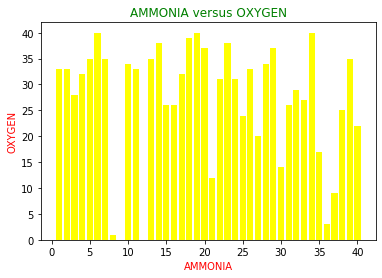

In [184]:
plt.xlabel("AMMONIA",color="red")
plt.ylabel("OXYGEN",color="red")
plt.title("AMMONIA versus OXYGEN" , color="green")
plt.bar(l.Ammonia,l.Oxygen,color='yellow')

<BarContainer object of 100 artists>

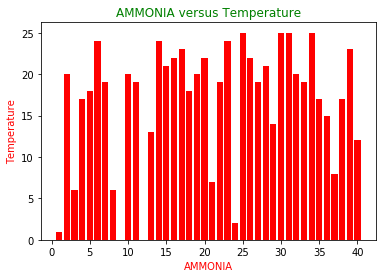

In [185]:
plt.xlabel("AMMONIA",color="red")
plt.ylabel("Temperature",color="red")
plt.title("AMMONIA versus Temperature" , color="green")
plt.bar(l.Ammonia,l.Temperature,color='red')

<BarContainer object of 100 artists>

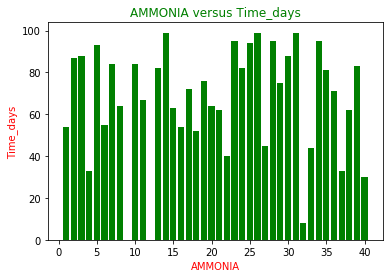

In [186]:
plt.xlabel("AMMONIA",color="red")
plt.ylabel("Time_days",color="red")
plt.title("AMMONIA versus Time_days" , color="green")
plt.bar(l.Ammonia,l.Time_days,color='green')

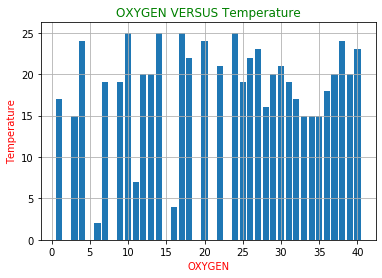

In [187]:
plt.xlabel("OXYGEN",color="red")
plt.ylabel("Temperature",color="red")
plt.title("OXYGEN VERSUS Temperature" , color="green")
plt.bar(l.Oxygen,l.Temperature)
plt.grid()

In [188]:
l.corr()

Ammonia    Oxygen  Temperature  Time_days  Condition_ripe
Ammonia         1.000000 -0.278015     0.065643  -0.082175        0.706706
Oxygen         -0.278015  1.000000    -0.052296   0.024416       -0.544913
Temperature     0.065643 -0.052296     1.000000  -0.025315        0.038212
Time_days      -0.082175  0.024416    -0.025315   1.000000       -0.016903
Condition_ripe  0.706706 -0.544913     0.038212  -0.016903        1.000000

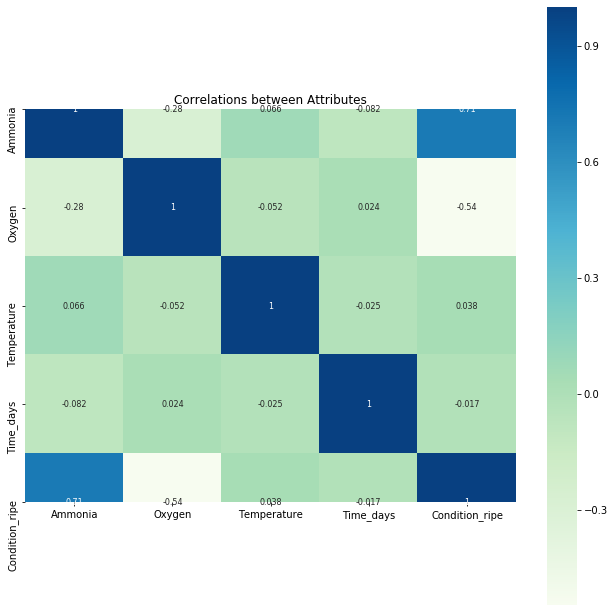

In [189]:
import seaborn as sns
fig = plt.subplots (figsize = (11, 11))
sns.heatmap(l.corr (), square = True, cbar = True, annot = True, cmap="GnBu", annot_kws = {'size': 8})
plt.title('Correlations between Attributes')
plt.show ()

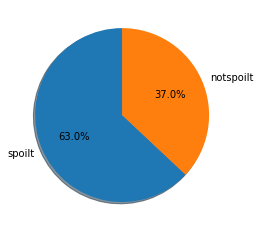

In [190]:
labels = ["spoilt",'notspoilt']
values=l['Outcome'].value_counts().values
fig1, ax1 = plt.subplots()
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
plt.show()

In [191]:
l.describe().T

count   mean        std  min   25%   50%    75%   max
Ammonia         100.0  21.33  11.111060  1.0  12.5  23.0  30.25  40.0
Oxygen          100.0  23.53  10.978818  1.0  14.0  26.0  33.00  40.0
Temperature     100.0  14.26   6.874958  1.0   8.0  15.0  20.00  25.0
Time_days       100.0  51.39  29.027641  3.0  26.0  53.0  81.00  99.0
Condition_ripe  100.0   0.63   0.485237  0.0   0.0   1.0   1.00   1.0

#### LOGISTIC REGRESSION

In [192]:
y = l['Condition_ripe']
X = l.drop('Outcome',axis = 1)

In [193]:
X

Ammonia  Oxygen  Temperature  Time_days  Condition_ripe
0        28      28            9         45               1
1         2       3           13         14               1
2         8       1            6         64               1
3        25      18           22          6               1
4        15      26           21         63               0
..      ...     ...          ...        ...             ...
95        5      35           15         20               0
96        7      26           19         40               0
97       37       9            8         33               1
98       10      34           15         84               0
99        6      40           23         25               0

[100 rows x 5 columns]

In [194]:
y.unique() 

array([1, 0], dtype=int64)

In [195]:
y

0     1
1     1
2     1
3     1
4     0
     ..
95    0
96    0
97    1
98    0
99    0
Name: Condition_ripe, Length: 100, dtype: int64

In [196]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state =101)

In [198]:
X_train

Ammonia  Oxygen  Temperature  Time_days  Condition_ripe
86        7      35            8         53               0
14       39      35            6         21               1
23       23      25           19         81               1
26       16      22           21         54               0
22       25      17           11         89               1
..      ...     ...          ...        ...             ...
63       29      16            4         54               1
70        7       7           19         15               1
81       25      10           20         94               1
11        5      26            6         93               0
95        5      35           15         20               0

[70 rows x 5 columns]

In [199]:
y_train

86    0
14    1
23    1
26    0
22    1
     ..
63    1
70    1
81    1
11    0
95    0
Name: Condition_ripe, Length: 70, dtype: int64

In [200]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(70, 5)
(30, 5)
(70,)
(30,)


In [201]:
from sklearn.linear_model import LogisticRegression

In [202]:
lr1 = LogisticRegression(multi_class = 'ovr', solver = 'sag',  max_iter = 5000)

In [203]:
lr1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

In [204]:
y_train_pred_lr = lr1.predict(X_train)

In [205]:
y_train_pred_lr

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0], dtype=int64)

In [206]:
confusion_matrix = metrics.confusion_matrix(y_train, y_train_pred_lr) #train
confusion_matrix

array([[29,  1],
       [ 1, 39]], dtype=int64)

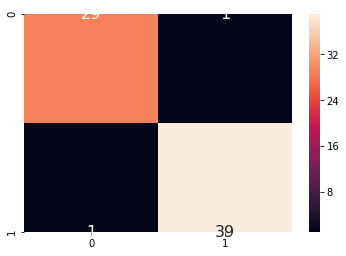

In [207]:
sns.heatmap(confusion_matrix,annot=True,annot_kws={"size": 16}, fmt='g') #train

In [208]:

a=classification_report(y_train, y_train_pred_lr)
print(a)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        30
           1       0.97      0.97      0.97        40

    accuracy                           0.97        70
   macro avg       0.97      0.97      0.97        70
weighted avg       0.97      0.97      0.97        70



In [209]:
y_test_pred_lr = lr1.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred_lr)
confusion_matrix

array([[ 5,  2],
       [ 0, 23]], dtype=int64)

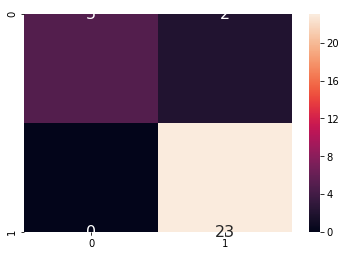

In [210]:
sns.heatmap(confusion_matrix,annot=True,annot_kws={"size": 16}, fmt='g') #test

In [211]:
k=classification_report(y_test, y_test_pred_lr)
print(k)

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.92      1.00      0.96        23

    accuracy                           0.93        30
   macro avg       0.96      0.86      0.90        30
weighted avg       0.94      0.93      0.93        30



In [212]:
from sklearn.linear_model import LogisticRegression


In [213]:
regressor=LogisticRegression(solver='lbfgs')
regressor.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [214]:
y_prediction=regressor.predict(X_test)
y_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

In [215]:
y_test.describe()

count    30.000000
mean      0.766667
std       0.430183
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Condition_ripe, dtype: float64

In [216]:
import math
from sklearn.metrics import mean_squared_error 
RMSE=math.sqrt(mean_squared_error(y_true=y_test,y_pred=y_prediction))

In [217]:
print(RMSE)

0.2581988897471611


#### LINEAR REGRESSION

In [218]:
from sklearn.linear_model import LinearRegression


In [219]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [220]:
y_prediction=regressor.predict(X_test)
y_prediction

array([ 1.00000000e+00,  1.00000000e+00, -3.76007571e-16,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00, -6.29622746e-17,  1.00000000e+00,
        1.00000000e+00, -4.20226628e-16,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  5.68945486e-17,  1.00000000e+00,  3.70167310e-16,
        1.00000000e+00,  1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
        1.00000000e+00,  1.00000000e+00,  7.21566764e-16,  8.95775448e-16,
        1.00000000e+00,  1.00000000e+00])

In [221]:
y_test.describe()

count    30.000000
mean      0.766667
std       0.430183
min       0.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Condition_ripe, dtype: float64

In [222]:
import math
from sklearn.metrics import mean_squared_error,r2_score
 
RMSE=math.sqrt(mean_squared_error(y_true=y_test,y_pred=y_prediction))

In [223]:
print(RMSE)

7.704761855311984e-16


## decision tree 

# SVM SUPPORT VECTOR MACHINE

In [224]:
l.columns

Index(['Ammonia', 'Oxygen', 'Temperature', 'Time_days', 'Condition_ripe',
       'Outcome'],
      dtype='object')

In [225]:
feature_df=l[['Ammonia', 'Oxygen', 'Temperature', 'Time_days']]

In [226]:
feature_df.head()

Ammonia  Oxygen  Temperature  Time_days
0       28      28            9         45
1        2       3           13         14
2        8       1            6         64
3       25      18           22          6
4       15      26           21         63

In [227]:
#independent variable
X=np.asarray(feature_df)

In [228]:
X[0:5]

array([[28, 28,  9, 45],
       [ 2,  3, 13, 14],
       [ 8,  1,  6, 64],
       [25, 18, 22,  6],
       [15, 26, 21, 63]], dtype=int64)

In [229]:
#dependent varaible
y=np.asarray(l['Condition_ripe'])

In [230]:
y[0:5]

array([1, 1, 1, 1, 0], dtype=int64)

In [231]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

In [232]:
X_train.shape

(80, 4)

In [233]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 4)
(20, 4)
(80,)
(20,)


In [234]:
from sklearn import svm

In [235]:
classifier=svm.SVC(kernel='linear',gamma='auto',C=2)


In [236]:
classifier.fit(X_train,y_train)
y_predict=classifier.predict(X_test)


In [237]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.87      0.93      0.90        14

    accuracy                           0.85        20
   macro avg       0.83      0.80      0.81        20
weighted avg       0.85      0.85      0.85        20



In [238]:
classifier.fit(X_train,y_train)
y_predict=classifier.predict(X_train)


In [239]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_train,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89        31
           1       0.96      0.90      0.93        49

    accuracy                           0.91        80
   macro avg       0.90      0.92      0.91        80
weighted avg       0.92      0.91      0.91        80



In [240]:
sns.pairplot(l)

In [241]:
k=sns.pairplot(l,hue='Outcome')
print(k)

D:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
